[False  True  True  True False  True  True  True False False  True]
0.31808 : train cost, 0.31302 : test cost, 63.63636363636363 : correction
[False  True  True  True False  True  True  True False False  True]
0.31302 : train cost, 0.30754 : test cost, 63.63636363636363 : correction
[False  True  True  True False  True  True  True False False  True]
0.30745 : train cost, 0.30133 : test cost, 63.63636363636363 : correction
[False  True  True  True False  True  True  True False False False]
0.30131 : train cost, 0.36808 : test cost, 54.54545454545454 : correction
[False  True  True  True False  True  True  True False False  True]
0.29453 : train cost, 0.28704 : test cost, 63.63636363636363 : correction
[False  True  True  True False  True  True  True False False False]
0.28704 : train cost, 0.34837 : test cost, 54.54545454545454 : correction
[False  True  True  True False  True  True  True False False  True]
0.27878 : train cost, 0.26969 : test cost, 63.63636363636363 : correction
[False

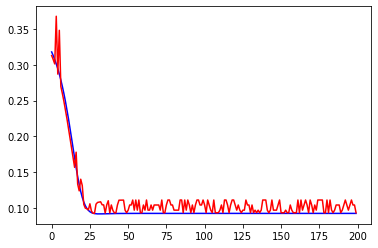

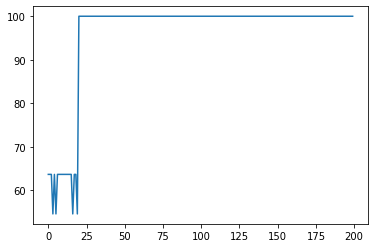

In [5]:
import numpy as np
import numpy.random as rd
import sys
import matplotlib.pyplot as plt

dataset_num = 10
variance = 0.5
wtflag = 0
learning_rate = 0.45
file_exist = False

batch = 100
epochs = 200

# making dataset
d_set = np.empty((1, 3), dtype=float)
if file_exist:
    tmp = np.load(sys.argv[1])
    d_set = np.append(d_set, tmp)
else:
    prob = rd.randint(0, 8, dataset_num)
    for i in prob:
        '''x = rd.normal(int(i/2)*2-1, variance)
        y = rd.normal(int(i/4)*2-1, variance)
        z = rd.normal(int(i/8)*2-1, variance)'''

        '''x = rd.normal(int(i / 2) * 2 - 1, variance)
        y = rd.normal(int(i / 4) * 2 - 1, variance)'''
        x = rd.randint(0, 2)
        y = rd.randint(0, 2)
        rst = x | y
        d_set = np.append(d_set, [[x, y, rst]], axis=0)
    if wtflag == 1:
        np.save('dataset.npy', d_set)
d_set = np.delete(d_set, 0, 0)

'''for i, data in enumerate(d_set):
    print(f'{i},\t {d_set[i, :]} ')'''


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SGD_single_Layer(x, w, node_num=1, bias=True, learning_rate = 0.01, ftn = 'sigmoid', mode='train' ):
    # make sing layer

    if bias == True:
        #print(np.ones((x.shape[0], 1)))
        x = np.hstack((np.ones((x.shape[0], 1)), x))
    #forwarding
    a = np.dot(x[:, 0:-1] , w.T)
    y_ = sigmoid(a)
    E = np.sum((y_ - x[:, -1])**2) / d_set.shape[0]
    #backpropagation delta
    delta = np.sum(y_ - x[:, -1]) / d_set.shape[0] *y_*(1-y_)
    #delta * x
    w_grad = np.array([x[i, 0:-1]*delta[i] for i in range(x.shape[0])])

    correct = 0
    #weight update
    if mode is 'train':
        w = w - np.sum(w_grad, axis=0)*learning_rate

        return w, delta, E
    #probable calculate
    elif mode is 'test':
        #cnt = 0
        #for i in range(x.shape[0]):
        #    if np.abs(y_[i] - x[i, -1]) < 0.1: cnt = cnt + 1

        cnt = np.array(np.abs(y_ - x[:, -1]) < 0.5)
        print(cnt)
        correct = np.sum(cnt)/x.shape[0]*100
        return w, correct, E

def double_Layer(x, w, node_num=1, bias=True, learning_rate = 0.01, ftn = 'sigmoid', mode='test' ):
    a = 1



def train(x):
    # initialize weight
    train_hist_E = []
    test_hist_E = []
    correct_hist = []
    b = rd.normal(1, 1, 3)

    for i in range(epochs):
        #train run!
        b, delta, E = SGD_single_Layer(d_set, b, learning_rate = learning_rate)
        train_hist_E.append(E)

        #making test_set
        test_set = np.empty((1, 3))
        prob = rd.randint(0, 8, dataset_num)
        for i in prob:
            '''x = rd.normal(int(i/2)*2-1, variance)
            y = rd.normal(int(i/4)*2-1, variance)
            z = rd.normal(int(i/8)*2-1, variance)'''
            x = rd.randint(0, 2)
            y = rd.randint(0, 2)
            rst = x | y
            test_set = np.append(d_set, [[x, y, rst]], axis=0)

        #test run!
        test_b, correction, test_E = SGD_single_Layer(test_set, b, mode='test')
        test_hist_E.append(test_E)
        correct_hist.append(correction)
        #print
        print(f'{E:.5} : train cost, {test_E:.5} : test cost, {correction} : correction')

    plt.figure()
    plt.plot(train_hist_E, 'b')
    plt.plot(test_hist_E, 'r')
    plt.show()

    plt.figure()
    plt.plot(correct_hist)
    plt.show()
train(1)
